# Latar Belakang

Saat ini sudah banyak bermunculan tempat berbelanja seperti Supermarket, Mall, dan swalayan yang banyak menyediakan barang keperluan sehari-hari. Berdasarkan data tahun 2022 jumlah supermarket di Indonesia sebanyak 1.544 retail atau tumbuh 5,18% dari tahun sebelumnya, ini menunjukkan bahwa belanja ditempat tersebut sudah menjadi gaya hidup masyarakat, terutama masyarakat menengah keatas.

Ketatnya persaingan bisnis menuntut perusahaan untuk memahami dan mempelajari berbagai perilaku konsumen, selain itu perusahaan juga sering kali melakukan inovasi atau strategi dalam meningkatkan mutu pelayanan serta meningkatkan profit perusahaan seperti dengan adanya layanan aduan/complain, diskon, campaign, dan memantau traffic website itu sendiri.

Salah satu cara untuk mengetahui dan memberi informasi untuk meningkatkan kebutuhan bisnis sebuah perusahaan dengan melakukan analisa data menggunakan data set Supermarket Customer Data Dictionary.

# Rumusan Masalah

Adapun rumusan masalah yang akan menadi topik pembahasan, antara lain :
1. Bagaimana perilaku customer yang sering melakukan transaksi/profit paling tinggi
2. Bagaimana campaign yang dijalankan, apakah sudah cukup berhasil?
3. Apa rekomendasi yang dapat diberikan untuk bahan evaluasi perusahaan

# Data Understanding and Cleaning

In [134]:
%pip install phik

Note: you may need to restart the kernel to use updated packages.


In [135]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [136]:
data = pd.read_csv(r"C:\Users\mahfu\Downloads\Supermarket Customers (1).csv",delimiter= "\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [137]:
data.shape

(2240, 29)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [139]:
display(data.describe(), data.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [140]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

### 1. Mengatasi Missing Value pada data

In [141]:
# Mengecek missing value pada data
totaldata = data.isnull().sum().sort_values(ascending=False)
presentasedata = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)

datahilang = pd.concat([totaldata, presentasedata], axis=1, keys=['Total', 'Percent'])
datahilang

,Total,Percent
Income,24,0.010714
ID,0,0.000000
NumDealsPurchases,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000
Complain,0,0.000000
AcceptedCmp2,0,0.000000
AcceptedCmp1,0,0.000000
AcceptedCmp5,0,0.000000
AcceptedCmp4,0,0.000000


In [142]:
# pertama melihat distribusi kolom Income
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Untuk mengisi data hilang pada kolom income, kita akan mencari kolom yang memiliki korelasi kuat terhadap income

interval columns not set, guessing: ['Year_Birth', 'Income']


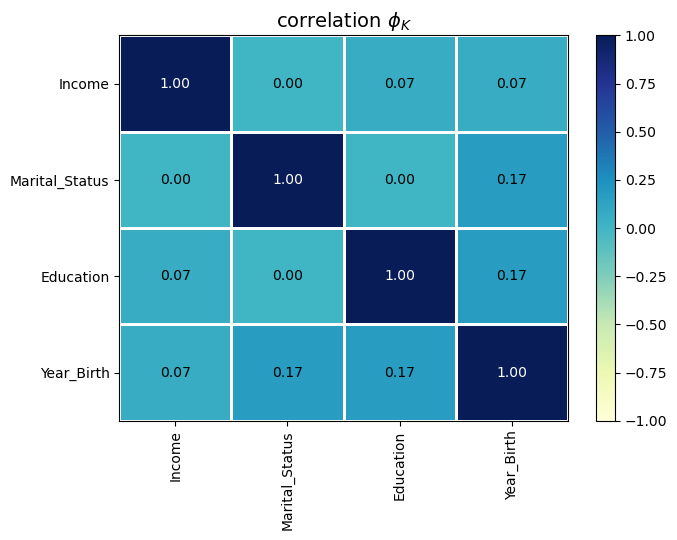

In [143]:
df = data[['Year_Birth', 'Education', 'Marital_Status', 'Income']]

phik_overview = df.phik_matrix()
phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=-1, vmax=1, color_map="YlGnBu", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(7, 5.5))
plt.tight_layout()

Berikut korelasinya, kita dapat lihat bahwa terdapat korelasi kuat antara Income, Year_Birth, dan Education
korelasinya sebagai berikut: 
1. korelasi antara kolom Income dan Year_Birth sebesar 0.07
2. korelasi antara kolom Income dan Education sebesar 0.07

sehingga dapat kita asumsikan bahwa terdapat korelasi atau hal yang mempengaruhi pendapatan seseorang yaitu umur dan pendidikan
kita akan mengisi data kosong pada income sesuai dengan korelasi kolom tersebut, sehingga kita membutuhkan kolom baru untuk mengetahui 
umur customer

In [144]:
# membuat kolom umur

data.insert(2, column= "Age", value= 2014 - data['Year_Birth'])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [145]:
data['Age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

Selanjutanya kita akan membuat kolom kategorikan berdasarkan umur customer, kita akan grouping berdasarkan usia

In [146]:
age_groups = []
for i in data['Age']:
    if i <= 18:
        age_groups.append('Children')
    if i > 18 and i <= 25:
        age_groups.append('Teenage')
    if i > 25 and i <= 45:
        age_groups.append('Adult')
    if i > 45 and i <= 65:
        age_groups.append('Eiderly')
    if i > 65:
        age_groups.append('Old')
        
data['AgeGroup'] = age_groups

In [147]:
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup
0,5524,1957,57,Graduation,Single,58138.0,0,0,04-09-2012,58,...,0,0,0,0,0,0,3,11,1,Eiderly
1,2174,1954,60,Graduation,Single,46344.0,1,1,08-03-2014,38,...,0,0,0,0,0,0,3,11,0,Eiderly
2,4141,1965,49,Graduation,Together,71613.0,0,0,21-08-2013,26,...,0,0,0,0,0,0,3,11,0,Eiderly
3,6182,1984,30,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,0,0,0,0,0,3,11,0,Adult
4,5324,1981,33,PhD,Married,58293.0,1,0,19-01-2014,94,...,0,0,0,0,0,0,3,11,0,Adult


Mengecek kolom Normalitas pada kolom Income dan Age

Median: 51381.5


<Axes: >

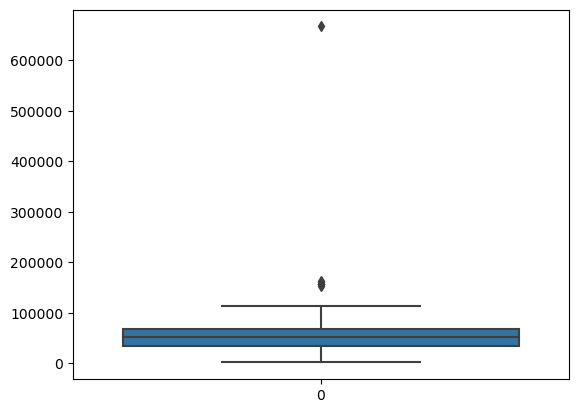

In [148]:
# cek normalitas kolom Income
print(f'Median: {df.Income.median()}')

sb.boxplot(data=data['Income'])

# sb.distplot(data['Income'])

C:\Users\mahfu\AppData\Local\Temp\ipykernel_3796\1883324361.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Income'])


<Axes: xlabel='Income', ylabel='Density'>

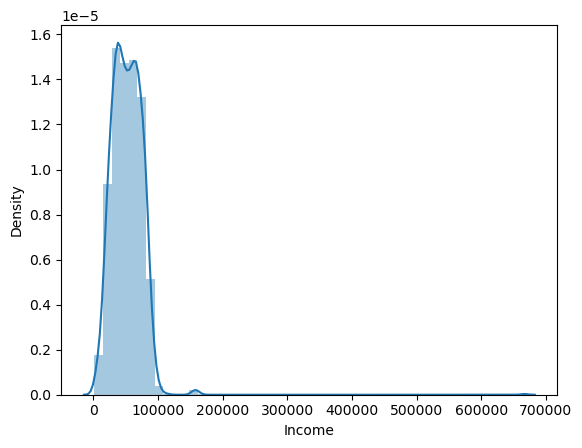

In [149]:
sb.distplot(data['Income'])

Median: 1970.0


<Axes: >

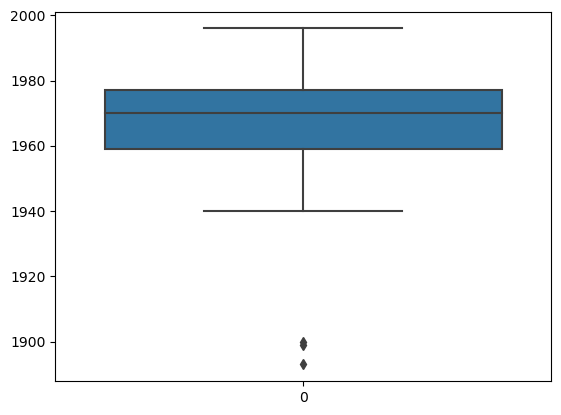

In [150]:
# Mengecek Normalitas kolom Age
print(f'Median: {data.Year_Birth.median()}')

sb.boxplot(data=data['Year_Birth'])

C:\Users\mahfu\AppData\Local\Temp\ipykernel_3796\1175138309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Year_Birth'])


<Axes: xlabel='Year_Birth', ylabel='Density'>

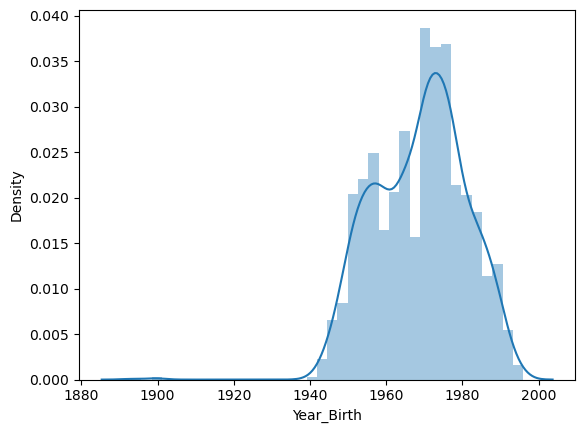

In [151]:
sb.distplot(data['Year_Birth'])

berdasarkan pengecekan pada kolom Income dan Year_Birth. Kedua kolom tersebut tidak berdistribusi normal karena terdapat outlier
oleh karena itu kita akan mengisi missing value dengan nilai median dengan melakukan grouping terlebih dahulu pada kolom agegroup dan education

In [152]:
med_grouping = data.query("~Income.isna()")[['AgeGroup','Education', 'Income']].groupby(['AgeGroup','Education']).agg(median_income=('Income', 'median')).reset_index()
med_grouping


,AgeGroup,Education,median_income
0,Adult,2n Cycle,36425.5
1,Adult,Basic,20425.0
2,Adult,Graduation,44421.0
3,Adult,Master,44239.0
4,Adult,PhD,52402.0
5,Children,2n Cycle,7500.0
6,Children,Basic,14421.0
7,Eiderly,2n Cycle,62905.0
8,Eiderly,Basic,22634.0
9,Eiderly,Graduation,57811.0


In [153]:
# Add Median Value for The Income that will be processed to fill the missing value 

new_data = pd.merge(data,med_grouping, on = ['AgeGroup','Education'], how = 'left')
new_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup,median_income
0,5524,1957,57,Graduation,Single,58138.0,0,0,04-09-2012,58,...,0,0,0,0,0,3,11,1,Eiderly,57811.0
1,2174,1954,60,Graduation,Single,46344.0,1,1,08-03-2014,38,...,0,0,0,0,0,3,11,0,Eiderly,57811.0
2,4141,1965,49,Graduation,Together,71613.0,0,0,21-08-2013,26,...,0,0,0,0,0,3,11,0,Eiderly,57811.0
3,6182,1984,30,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,0,0,0,0,3,11,0,Adult,44421.0
4,5324,1981,33,PhD,Married,58293.0,1,0,19-01-2014,94,...,0,0,0,0,0,3,11,0,Adult,52402.0


In [154]:
# entered the median income data for each NaN / Missing Value, according to the each category

for i in range (len(new_data)):
    if len(str(new_data.Income[i])) == 3:
        new_data.Income[i] = new_data.median_income[i]
    else:
        continue

C:\Users\mahfu\AppData\Local\Temp\ipykernel_3796\2875337883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.Income[i] = new_data.median_income[i]


In [155]:
# check for make sure the missing value have be filled in
new_data.isnull().sum()

ID                     0
Year_Birth             0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
AgeGroup               0
median_income          0
dtype: int64

In [156]:
del new_data['median_income']

In [157]:
income_new = new_data['Income'].describe()
income_new

count      2240.000000
mean      52233.434821
std       25053.855829
min        1730.000000
25%       35538.750000
50%       51400.500000
75%       68325.000000
max      666666.000000
Name: Income, dtype: float64

### 2. Mengubah format tipe data

In [158]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Age                  2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2240 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

Terdapat kolom dengan tipe data yang masih belum sesuai yaitu : Dt_Customer

In [159]:
new_data['Dt_Customer'] = pd.to_datetime(new_data['Dt_Customer'], format='%d-%m-%Y')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Age                  2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2240 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

### 3. Mendeteksi Duplicates pada data

In [160]:
duplikasi = new_data[new_data.duplicated()]

print("Duplicate Rows :")
duplikasi

Duplicate Rows :


,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup


### 4. Mengecek kolom ID

In [161]:
# mengecek apakah kolom ID(primary key) ada yang bernilai 0
new_data.loc[new_data['ID'] == 0]

# generates random integer number to fill that zero value ID
id = [id for id in new_data['ID']]
np.random.seed(22)
id_0 = 0
while True:
    randomnumber = np.random.randint(low=1, high=10000)
    if randomnumber not in id:
        id_0 += randomnumber
        break
    else:
        continue

# replacing zero value
new_data['ID'] = new_data['ID'].replace(0,id_0)
new_data.loc[new_data['ID'] == id_0]

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup
214,6277,1985,29,Graduation,Married,70951.0,0,0,2013-05-04,66,...,0,0,0,0,0,0,3,11,0,Adult


### 5. Mengatasi nilai Outlier pada data

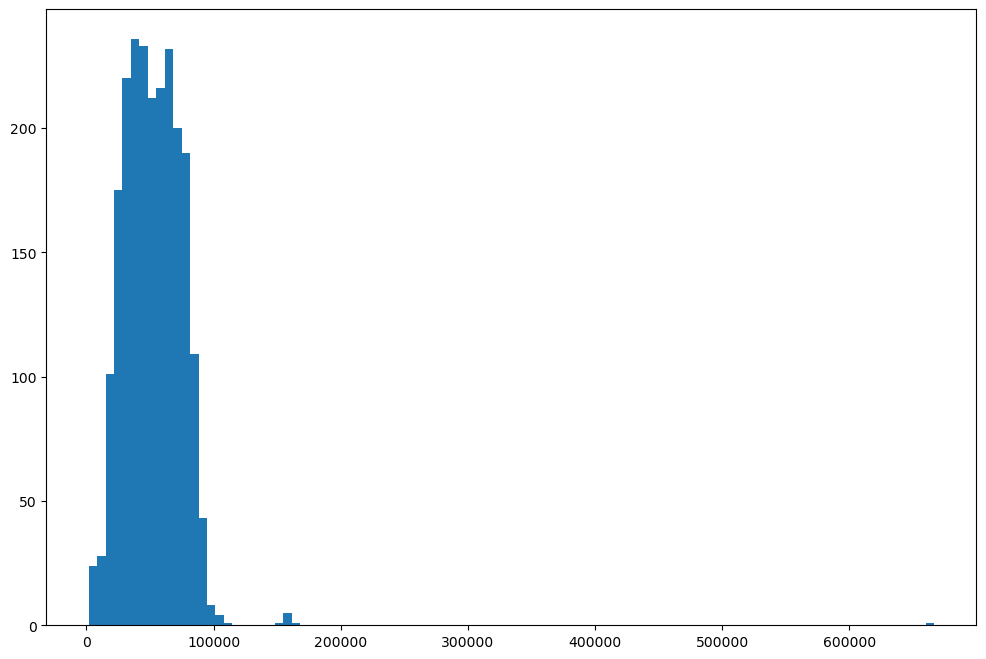

In [162]:
# detecting outlier
fig, ax = plt.subplots(figsize=(12,8))
ax.hist (new_data['Income'], bins=100)
plt.show()

In [163]:
# membuat batas atas dan batas bawah dalam distribusi data ini
mean = new_data['Income'].mean()
std = new_data['Income'].std()
med_income = new_data['Income'].median()

In [164]:
limit_atas = mean + (3*std)
limit_bawah = mean - (3*std)

In [165]:
limit_atas

127395.00230811229

In [166]:
new_data['Income'].describe()

count      2240.000000
mean      52233.434821
std       25053.855829
min        1730.000000
25%       35538.750000
50%       51400.500000
75%       68325.000000
max      666666.000000
Name: Income, dtype: float64

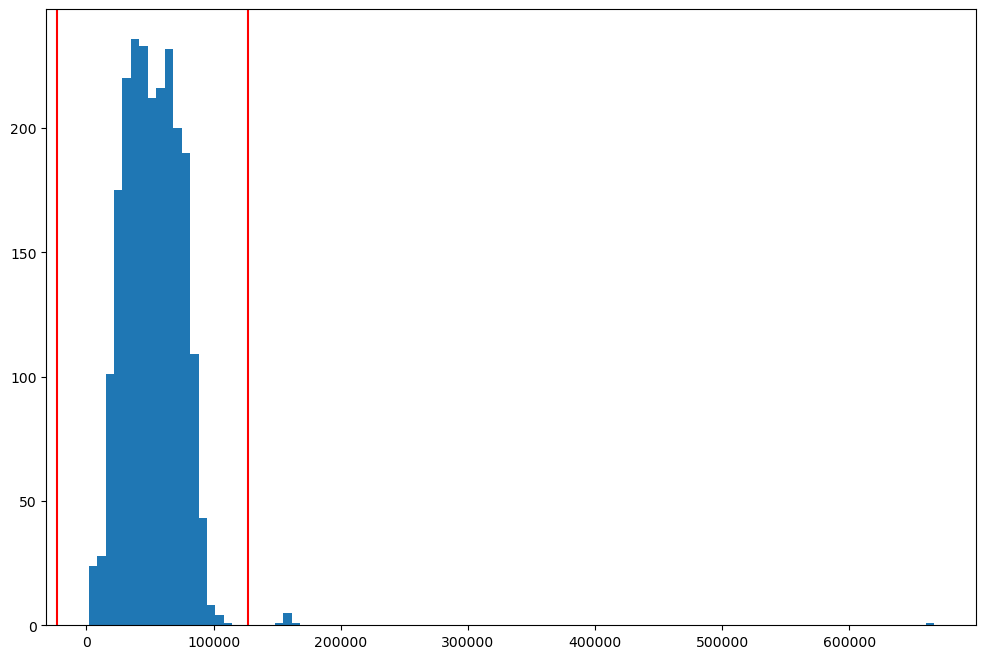

In [167]:
# detecting outlier
fig, ax = plt.subplots(figsize=(12,8))
ax.hist (new_data['Income'], bins=100)

ax.axvline(limit_atas, color='red')
ax.axvline(limit_bawah, color='red')
plt.show()

In [168]:
lower = (new_data['Income'] < limit_bawah).sum()
upper = (new_data['Income'] > limit_atas).sum()

print("batas atas outlier atas kolom Income ada: {} baris".format(upper))
print("batas atas outlier bawah kolom Income ada: {} baris".format(lower))

batas atas outlier atas kolom Income ada: 8 baris
batas atas outlier bawah kolom Income ada: 0 baris


In [169]:
# Check the data of Income column that have value higher that upperbound, we call it as outliers

new_data.loc[new_data['Income'] >= limit_atas] 

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup
164,8475,1973,41,PhD,Married,157243.0,0,1,2014-03-01,98,...,0,0,0,0,0,0,3,11,0,Adult
617,1503,1976,38,PhD,Together,162397.0,1,1,2013-06-03,31,...,0,0,0,0,0,0,3,11,0,Adult
655,5555,1975,39,Graduation,Divorced,153924.0,0,0,2014-02-07,81,...,0,0,0,0,0,0,3,11,0,Adult
687,1501,1982,32,PhD,Married,160803.0,0,0,2012-08-04,21,...,0,0,0,0,0,0,3,11,0,Adult
1300,5336,1971,43,Master,Together,157733.0,1,0,2013-06-04,37,...,0,0,0,0,0,0,3,11,0,Adult
1653,4931,1977,37,Graduation,Together,157146.0,0,0,2013-04-29,13,...,0,0,0,0,0,0,3,11,0,Adult
2132,11181,1949,65,PhD,Married,156924.0,0,0,2013-08-29,85,...,0,0,0,0,0,0,3,11,0,Eiderly
2233,9432,1977,37,Graduation,Together,666666.0,1,0,2013-06-02,23,...,0,0,0,0,0,0,3,11,0,Adult


In [170]:
# mengubah nilai income pada outlier

def out_Inc(new_data):
    if new_data['Income'] > limit_atas:
        return med_income
    else:
        return new_data['Income']

new_data['Income'] = new_data.apply(out_Inc, axis=1)

In [171]:
new_data.query("ID == 8475 or ID == 1503 or ID == 5555 or ID == 1501	 or ID == 5336 or ID == 4931 or ID == 11181 or ID == 9432")


,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup
164,8475,1973,41,PhD,Married,51400.5,0,1,2014-03-01,98,...,0,0,0,0,0,0,3,11,0,Adult
617,1503,1976,38,PhD,Together,51400.5,1,1,2013-06-03,31,...,0,0,0,0,0,0,3,11,0,Adult
655,5555,1975,39,Graduation,Divorced,51400.5,0,0,2014-02-07,81,...,0,0,0,0,0,0,3,11,0,Adult
687,1501,1982,32,PhD,Married,51400.5,0,0,2012-08-04,21,...,0,0,0,0,0,0,3,11,0,Adult
1300,5336,1971,43,Master,Together,51400.5,1,0,2013-06-04,37,...,0,0,0,0,0,0,3,11,0,Adult
1653,4931,1977,37,Graduation,Together,51400.5,0,0,2013-04-29,13,...,0,0,0,0,0,0,3,11,0,Adult
2132,11181,1949,65,PhD,Married,51400.5,0,0,2013-08-29,85,...,0,0,0,0,0,0,3,11,0,Eiderly
2233,9432,1977,37,Graduation,Together,51400.5,1,0,2013-06-02,23,...,0,0,0,0,0,0,3,11,0,Adult


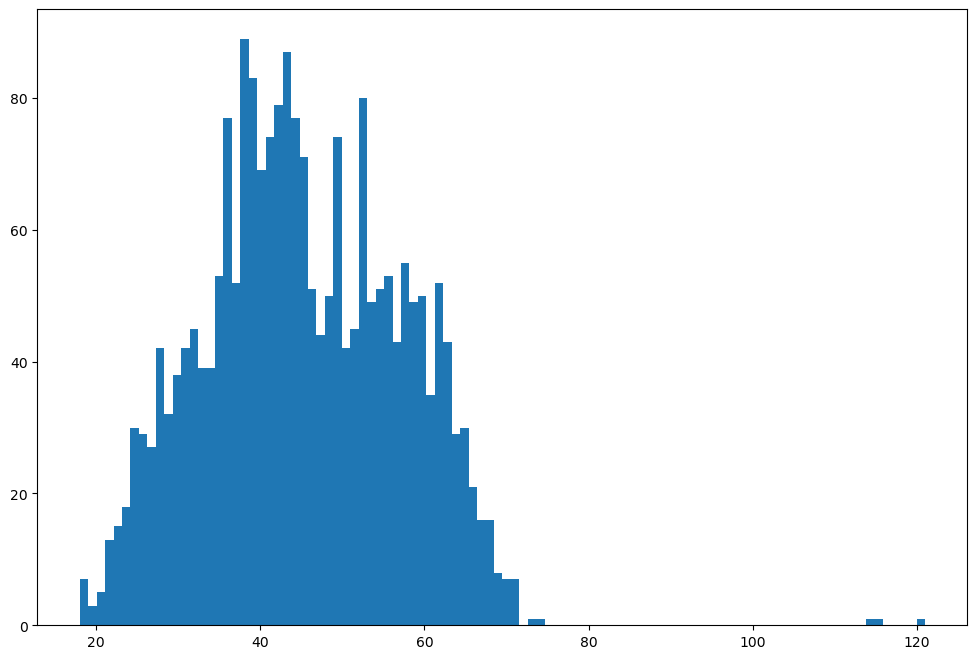

In [172]:
# Kolom Age
# detecting outlier
fig, ax = plt.subplots(figsize=(12,8))
ax.hist (new_data['Age'], bins=100)
plt.show()

In [173]:
# membuat batas atas dan batas bawah dalam distribusi data ini
mean_age = new_data['Age'].mean()
std_age = new_data['Age'].std()
med_age = new_data['Age'].median()

In [174]:
limit_atas_age = mean_age + (3*std_age)
limit_bawah_age = mean_age - (3*std_age)

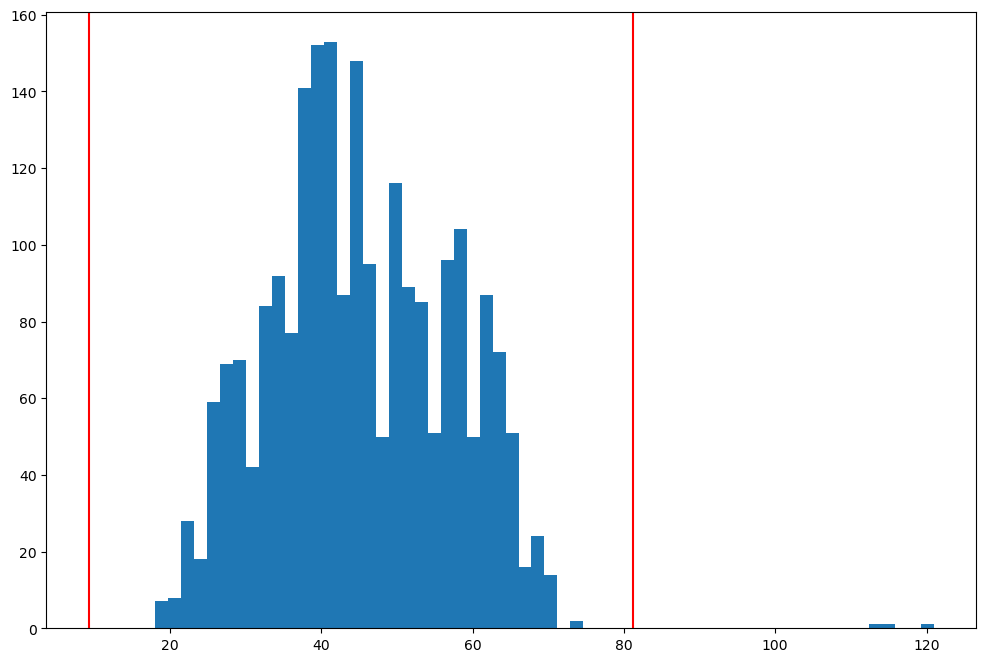

In [175]:
# detecting outlier
fig, ax = plt.subplots(figsize=(12,8))
ax.hist (new_data['Age'], bins=60)

ax.axvline(limit_atas_age, color='red')
ax.axvline(limit_bawah_age, color='red')
plt.show()

In [176]:
lower_age = (new_data['Age'] < limit_bawah_age).sum()
upper_age = (new_data['Age'] > limit_atas_age).sum()

print("batas atas outlier atas kolom Age ada: {} baris".format(upper_age))
print("batas atas outlier bawah kolom Age ada: {} baris".format(lower_age))

batas atas outlier atas kolom Age ada: 3 baris
batas atas outlier bawah kolom Age ada: 0 baris


In [177]:
# Check the data of Income column that have value higher that upperbound, we call it as outliers

new_data.loc[new_data['Age'] >= limit_atas_age] 

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup
192,7829,1900,114,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,...,0,0,0,0,0,1,3,11,0,Old
239,11004,1893,121,2n Cycle,Single,60182.0,0,1,2014-05-17,23,...,0,0,0,0,0,0,3,11,0,Old
339,1150,1899,115,PhD,Together,83532.0,0,0,2013-09-26,36,...,0,0,1,0,0,0,3,11,0,Old


In [178]:
# mengubah nilai income pada outlier

def coba(new_data):
    if new_data['Age'] > limit_atas_age:
        return med_age
    else:
        return new_data['Age']

new_data['Age'] = new_data.apply(coba, axis=1)

C:\Users\mahfu\AppData\Local\Temp\ipykernel_3796\459570061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(new_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

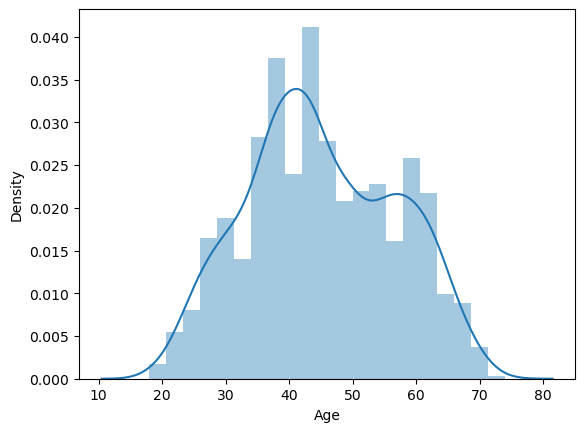

In [179]:
sb.distplot(new_data['Age'])

# Data Preparation

### Menambahkan kolom kategori pada Income

In [180]:
income_groups = []
for i in new_data['Age']:
    if i <= 35533.5:
        income_groups.append('Lower')
    if i > 35533.5 and i <= 51400.5:
        income_groups.append('Lower-Middle')
    if i > 51400.5 and x <= 68334.0:
        income_groups.append('Upper-Middle')
    if i >= 68334.0:
        income_groups.append('Old')
        
new_data['Income_category'] = income_groups

In [181]:
new_data

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup,Income_category
0,5524,1957,57.0,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,0,3,11,1,Eiderly,Lower
1,2174,1954,60.0,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,3,11,0,Eiderly,Lower
2,4141,1965,49.0,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,3,11,0,Eiderly,Lower
3,6182,1984,30.0,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,3,11,0,Adult,Lower
4,5324,1981,33.0,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,3,11,0,Adult,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47.0,Graduation,Married,61223.0,0,1,2013-06-13,46,...,0,0,0,0,0,3,11,0,Eiderly,Lower
2236,4001,1946,68.0,PhD,Together,64014.0,2,1,2014-06-10,56,...,0,0,1,0,0,3,11,0,Old,Lower
2237,7270,1981,33.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,1,0,0,0,0,3,11,0,Adult,Lower
2238,8235,1956,58.0,Master,Together,69245.0,0,1,2014-01-24,8,...,0,0,0,0,0,3,11,0,Eiderly,Lower


In [182]:
new_data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

### Merubah nilai pada kolom status

Pada kolom marital status, value pada kolom tersebut terdapat nilai ambigu yang menyebabkan inbalance data pada setiap kategorinya
sehingga ada baiknya kolom dengan nilai sedikit kita sesuaikan dengan kategori lainnya

In [183]:
# replace several values
change_value = {
                'Together' : 'Married',
                'YOLO' : 'Single',
                'Absurd' : 'Single',
                'Alone' : 'Single'
}

new_data['Marital_Status'].replace(change_value, inplace=True)

In [184]:
new_data['Marital_Status'].value_counts()

Married     1444
Single       487
Divorced     232
Widow         77
Name: Marital_Status, dtype: int64

### Mengubah kategori 2n Cycle pada kolom Education

Berdasarkan hasil browser di google, tingkat pendidikan 2n Cycle setara dengan program master(S2)

In [185]:
Edu_new = {
        '2n Cycle' : 'Master'
}
new_data['Education'].replace(Edu_new, inplace = True)

### Menambah beberapa kolom untuk memudahkan dalam melakukan analisis

Untuk memudahkan dalam melakukan analisis saya menambahkan 2 kolom baru, yaitu TotalMnt dan TotalAcceptedCmp
TotalMnt didapat dengan menjumlahkan semua Total produk n\
TotalMnt = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds

TotalAcceptedCmp = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5

In [186]:
# Membuat TotalMnt Kolom

new_data.insert(18, column="TotalMnt", value=new_data['MntWines']+new_data['MntFruits']+new_data['MntMeatProducts']+new_data
                ['MntFishProducts']+new_data['MntSweetProducts']+new_data['MntGoldProds'])
new_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup,Income_category
0,5524,1957,57.0,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,0,3,11,1,Eiderly,Lower
1,2174,1954,60.0,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,3,11,0,Eiderly,Lower
2,4141,1965,49.0,Graduation,Married,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,3,11,0,Eiderly,Lower
3,6182,1984,30.0,Graduation,Married,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,3,11,0,Adult,Lower
4,5324,1981,33.0,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,3,11,0,Adult,Lower


In [187]:
#
new_data.insert(29, column="TotalAcceptedCmp", value=new_data['AcceptedCmp1']+new_data['AcceptedCmp2']+new_data['AcceptedCmp3']+new_data['AcceptedCmp4']+new_data['AcceptedCmp5']+new_data['Response'])
new_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,TotalAcceptedCmp,Z_Revenue,Response,AgeGroup,Income_category
0,5524,1957,57.0,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,3,1,11,1,Eiderly,Lower
1,2174,1954,60.0,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,3,0,11,0,Eiderly,Lower
2,4141,1965,49.0,Graduation,Married,71613.0,0,0,2013-08-21,26,...,0,0,0,0,3,0,11,0,Eiderly,Lower
3,6182,1984,30.0,Graduation,Married,26646.0,1,0,2014-02-10,26,...,0,0,0,0,3,0,11,0,Adult,Lower
4,5324,1981,33.0,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,3,0,11,0,Adult,Lower


### Drop kolom yang tidak berkorelasi atau tidak digunakan dalam kebutuhan Analisi

Dalam dataset SupermarketCustomers terdapat dua kolom yang tidak dibutuhkan dalam analisis, karena value didalamnya memiliki nilai yang sama yaitu kolom
- Z_CostContact
- Z_Revenue

In [188]:
# drop kolom zcost_contact dan z_revenue
new_data.drop(columns = ['Z_CostContact'], axis = 1, inplace = True)
new_data.drop(columns = ['Z_Revenue'], axis = 1, inplace = True)

In [189]:
new_data

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,TotalAcceptedCmp,Response,AgeGroup,Income_category
0,5524,1957,57.0,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,0,0,0,0,0,1,1,Eiderly,Lower
1,2174,1954,60.0,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,0,0,0,0,0,0,Eiderly,Lower
2,4141,1965,49.0,Graduation,Married,71613.0,0,0,2013-08-21,26,...,0,0,0,0,0,0,0,0,Eiderly,Lower
3,6182,1984,30.0,Graduation,Married,26646.0,1,0,2014-02-10,26,...,0,0,0,0,0,0,0,0,Adult,Lower
4,5324,1981,33.0,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,0,0,0,0,0,0,Adult,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47.0,Graduation,Married,61223.0,0,1,2013-06-13,46,...,0,0,0,0,0,0,0,0,Eiderly,Lower
2236,4001,1946,68.0,PhD,Married,64014.0,2,1,2014-06-10,56,...,0,0,0,1,0,0,1,0,Old,Lower
2237,7270,1981,33.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,0,1,0,0,0,0,1,0,Adult,Lower
2238,8235,1956,58.0,Master,Married,69245.0,0,1,2014-01-24,8,...,0,0,0,0,0,0,0,0,Eiderly,Lower


### Memindahkan kolom agegroup dan income_category ke depan

In [190]:
ag_column = new_data.pop('AgeGroup')
new_data.insert(3, 'AgeGroup', ag_column)
new_data.head()

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,TotalAcceptedCmp,Response,Income_category
0,5524,1957,57.0,Eiderly,Graduation,Single,58138.0,0,0,2012-09-04,...,7,0,0,0,0,0,0,1,1,Lower
1,2174,1954,60.0,Eiderly,Graduation,Single,46344.0,1,1,2014-03-08,...,5,0,0,0,0,0,0,0,0,Lower
2,4141,1965,49.0,Eiderly,Graduation,Married,71613.0,0,0,2013-08-21,...,4,0,0,0,0,0,0,0,0,Lower
3,6182,1984,30.0,Adult,Graduation,Married,26646.0,1,0,2014-02-10,...,6,0,0,0,0,0,0,0,0,Lower
4,5324,1981,33.0,Adult,PhD,Married,58293.0,1,0,2014-01-19,...,5,0,0,0,0,0,0,0,0,Lower


In [191]:
test_column = new_data.pop('Income_category')
new_data.insert(7, 'Income_category', test_column)
new_data.head()

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,Income_category,Kidhome,Teenhome,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,TotalAcceptedCmp,Response
0,5524,1957,57.0,Eiderly,Graduation,Single,58138.0,Lower,0,0,...,4,7,0,0,0,0,0,0,1,1
1,2174,1954,60.0,Eiderly,Graduation,Single,46344.0,Lower,1,1,...,2,5,0,0,0,0,0,0,0,0
2,4141,1965,49.0,Eiderly,Graduation,Married,71613.0,Lower,0,0,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30.0,Adult,Graduation,Married,26646.0,Lower,1,0,...,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33.0,Adult,PhD,Married,58293.0,Lower,1,0,...,6,5,0,0,0,0,0,0,0,0


### Menyimpan data yang sudah bersih

In [192]:
# menyimpan data ke csv
new_data.to_csv("SupermarketCustomers_clean.csv")

In [193]:
new_data.to_excel(f"SupermarketCustomers_clean2.xlsx")